# YOUR PROJECT TITLE

# OLG Economy (Diamond Model)

The Overlapping Generations (OLG) Diamond model, developed by Peter Diamond in the 1960s, is a widely used framework in economics to examine intergenerational dynamics and various economic phenomena. This model offers valuable insights into the interactions between different generations, capital accumulation, and economic growth.

One key feature of the OLG Diamond model is its intergenerational aspect. The model assumes that individuals are born into the young generation and progress through the life cycle. When individuals reach the old stage, they retire and transfer their accumulated wealth to the next generation. This intergenerational transfer mechanism is a fundamental aspect of the model and plays a crucial role in determining economic outcomes and welfare.

We will investigate how households optimize their consumption, saving, and labor supply decisions over their lifetimes. By examining the equilibrium conditions of the model, we aim to understand the factors that drive consumption, savings, and welfare outcomes in an OLG Diamond framework.

The utility is given by:

$$ U = \ln(c_{1t}) + \beta \ln(c_{2t+1}), \beta \in [0,1]$$

The single period dynamic budget constraints are:

$$ c_{1t} = w_t - s_t $$
$$ c_{2t+1} = (1+r_{t+1}) s_t $$

The intertemporal Budget Constraint (IBC) is:

$$ c_{1t} + \frac{c_{2t+1}}{1+r_{t+1}} = w_t $$



We start off by importing all the relevant packages for our analysis

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
sm.init_printing(use_unicode=True)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
import ipywidgets as widgets

We are now defining all the variables and parameters from our model. 

In [2]:
# Variables and parameters from utility function
C1t = sm.symbols('C_1t')
C2t_1 = sm.symbols('C_2t+1')
U_t = sm.symbols('U_t')

# Variables and parameters from budget constraint and period constraints
alpha = sm.symbols('alpha')
beta = sm.symbols('beta')
w_t = sm.symbols('w_t')
k_t = sm.symbols('k_t')
r_t = sm.symbols('r_t')
r_t1 = sm.symbols('r_t+1')

At = sm.symbols('A_t') 
St = sm.symbols('S_t') 
s = sm.symbols('s(r_t+1)') 

Budget constraints are given as:


Then we combine the constraints:


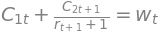

In [10]:
# Defining utility function and constraints
U = sm.log(C1t) + beta * sm.log(C2t_1)
cons1 = sm.Eq(C1t + St, w_t)
cons2 = sm.Eq(C2t_1, (1+r_t1)*St)

# To find one budget constraint we solve for s_t:
st_from_cons2 = sm.solve(cons2, St)
cons1_with_st = cons1.subs(St, st_from_cons2[0])

print('Budget constraints are given as:')
display(cons1)
display(cons2)
print('Then we combine the constraints:')
display(cons1_with_st)




optimal Consumption in period 1:


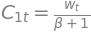

optimal Consumption in period 2:


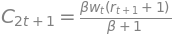

Euler Equation:


In [15]:
C2t_1_from_cons = sm.solve(cons1_with_st, C2t_1)
obj_subs = U.subs(C2t_1, C2t_1_from_cons[0])
foc1 = sm.diff(obj_subs, C1t)
solve_1 = sm.solve(sm.Eq(foc1, 0), C1t)
opt_c1t = sm.Eq(C1t, solve_1[0])

c1t_from_cons = sm.solve(cons1_with_st, C1t)
obj_subs = U.subs(C1t, c1t_from_cons[0])
foc2 = sm.diff(obj_subs, C2t_1)
solve_2 = sm.solve(sm.Eq(foc2, 0), C2t_1)
opt_c2t1 = sm.Eq(C2t_1, solve_2[0])

euler = solve_2[0]/solve_1[0]
euler_eq = sm.Eq(C2t_1/C1t, euler)

print('optimal Consumption in period 1:')
display(opt_c1t)
print('optimal Consumption in period 2:')
display(opt_c2t1)
print('Euler Equation:')
display(euler_eq)



Saving Equation:


Insert optimal first period consumption:


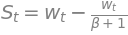

Simplify:


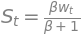

In [25]:
#Savings

savings_P1 = sm.solve(cons1, St)
savings_P1_eq = sm.Eq(St, savings_P1[0])
savings = savings_P1_eq.subs(C1t, solve_1[0])
simple_savings = sm.simplify(savings)

print('Saving Equation:')
display(savings_P1_eq)
print('Insert optimal first period consumption:')
display(savings)
print('Simplify:')
display(simple_savings)


From the savings equation we can see that savings is not dependent on $ r_{t+1} $.

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 